In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import time
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
import missingno as msn
import geopandas as gpd
from shapely.geometry import  Point
import seaborn as sns
import folium
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn import metrics

In [3]:
train = pd.read_csv("C:/Users/Surface/Documents/BDA_106/Data/Project_SF/train.csv", parse_dates=['Dates'])
test = pd.read_csv("C:/Users/Surface/Documents/BDA_106/Data/Project_SF/test.csv", parse_dates=['Dates'], index_col = 'Id')

In [4]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
test.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [6]:
print (train.shape)
print (test.shape)

(878049, 9)
(884262, 6)


In [7]:
train.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

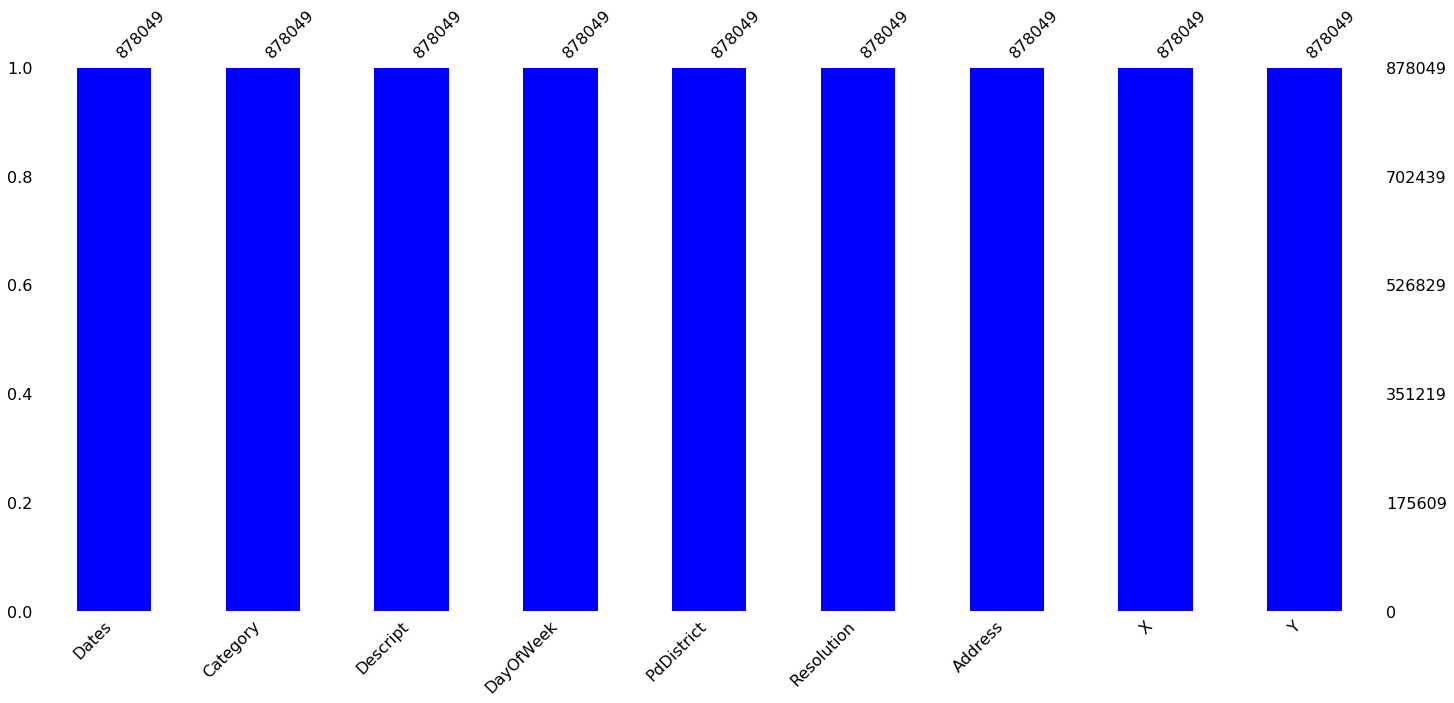

In [8]:
msn.bar(train, color = 'blue')

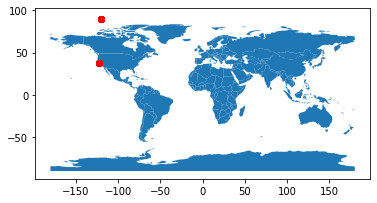

In [9]:
def create_geodf(df):
    geodf = df.copy()
    geodf['Coordinates'] = list(zip(geodf.X, geodf.Y))
    geodf.Coordinates = geodf.Coordinates.apply(Point)
    geodf = gpd.GeoDataFrame(geodf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return geodf

train_geodf = create_geodf(train)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
point = world.plot()
train_geodf.plot(ax=point, color = 'red')
plt.show()

In [10]:
print(train_geodf.loc[train_geodf.Y > 50].count()[0])
train_geodf.loc[train_geodf.Y > 50].sample(10)

67


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Coordinates
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0,POINT (-120.50000 90.00000)
767318,2004-06-24 13:00:00,OTHER OFFENSES,TRAFFIC VIOLATION,Thursday,MISSION,"ARREST, CITED",FLORIDA ST / ALAMEDA ST,-120.5,90.0,POINT (-120.50000 90.00000)
673115,2005-10-23 18:11:00,OTHER OFFENSES,INDECENT EXPOSURE,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0,POINT (-120.50000 90.00000)
688950,2005-08-09 23:15:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,TARAVAL,"ARREST, CITED",GENEVA AV / INTERSTATE280 HY,-120.5,90.0,POINT (-120.50000 90.00000)
871198,2003-02-05 12:00:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,SOUTHERN,NONE,SPEAR ST / THE EMBARCADERO SOUTH ST,-120.5,90.0,POINT (-120.50000 90.00000)
682780,2005-09-09 00:03:00,ASSAULT,BATTERY,Friday,TENDERLOIN,NONE,ELLIS ST / 5THSTNORTH ST,-120.5,90.0,POINT (-120.50000 90.00000)
767501,2004-06-24 00:03:00,DISORDERLY CONDUCT,COMMITTING PUBLIC NUISANCE,Thursday,NORTHERN,"ARREST, BOOKED",AUSTIN ST / LARKIN ST,-120.5,90.0,POINT (-120.50000 90.00000)
772431,2004-05-28 18:00:00,VEHICLE THEFT,"VEHICLE, RECOVERED, OTHER VEHICLE",Friday,SOUTHERN,NONE,BRYANT ST / SPEAR ST,-120.5,90.0,POINT (-120.50000 90.00000)
727080,2005-01-25 21:32:00,OTHER OFFENSES,FALSE EVIDENCE OF VEHICLE REGISTRATION,Tuesday,TENDERLOIN,"ARREST, BOOKED",EDDY ST / 5THSTNORTH ST,-120.5,90.0,POINT (-120.50000 90.00000)
823378,2003-09-21 13:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,BAYVIEW,NONE,GILMAN AV / FITCH ST,-120.5,90.0,POINT (-120.50000 90.00000)


In [12]:
from sklearn.impute import SimpleImputer
train.drop_duplicates(inplace=True)
train.replace({'X':-120.5,'Y':90.0},np.NaN,inplace=True)
test.replace({'X':-120.5,'Y':90.0},np.NaN,inplace=True)

imp_mean = SimpleImputer(strategy='mean')

for district in train['PdDistrict'].unique():
    train.loc[train['PdDistrict'] == district,['X','Y']] = imp_mean.fit_transform(train.loc[train['PdDistrict'] == district,['X','Y']])
    test.loc[test['PdDistrict'] == district,['X','Y']] = imp_mean.fit_transform(test.loc[test['PdDistrict'] == district,['X','Y']])

train_geodf = create_geodf(train)

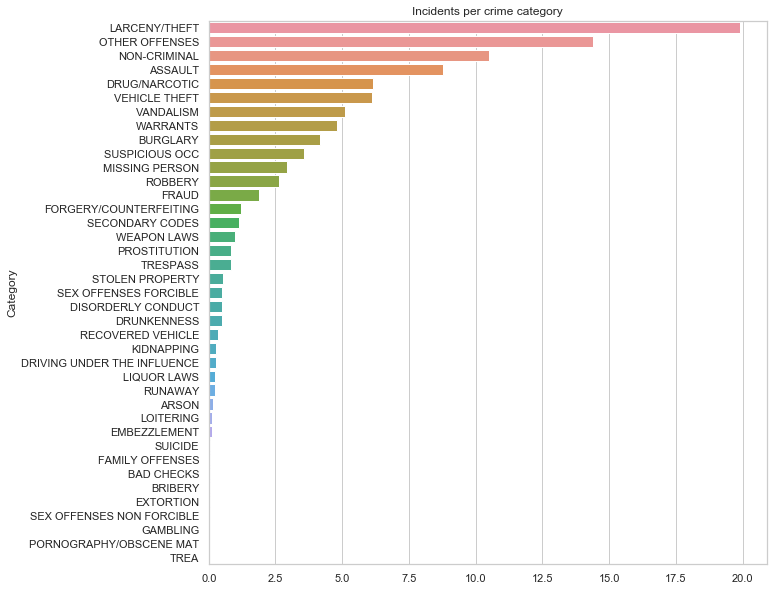

In [13]:
data_category = train.groupby('Category').count().iloc[:,0].sort_values(ascending= False)
plt.figure(figsize=(10,10))
sns.set(style= 'whitegrid')
ax = sns.barplot((data_category.values/data_category.values.sum())*100,data_category.index)
plt.title('Incidents per crime category')
plt.show()

In [15]:
dis_json = r'https://cocl.us/sanfran_geojson'
dist_crime = pd.DataFrame(train['PdDistrict'].value_counts().astype(float))
dist_crime = dist_crime.reset_index()
dist_crime.columns = ['District', 'Number']

map_san = folium.Map(location = [37.77, -122.42], zoom_start= 12)
map_san.choropleth(geo_data = dis_json,data = dist_crime,columns = ['District', 'Number'],
                   key_on='feature.properties.DISTRICT',fill_color='YlOrRd',#YlGn 
                   fill_opacity=0.7,line_opacity=0.2,legend_name='Crime Rate in San Francisco')
folium.LayerControl().add_to(map_san)
map_san.save('#292_folium_chloropleth_SFPD.html')

In [16]:
dist_crime

,District,Number
0,SOUTHERN,156528.0
1,MISSION,119723.0
2,NORTHERN,105105.0
3,BAYVIEW,89098.0
4,CENTRAL,85267.0
5,TENDERLOIN,81642.0
6,INGLESIDE,78722.0
7,TARAVAL,65400.0
8,PARK,49161.0
9,RICHMOND,45080.0


In [17]:
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Dates'].dt.date)
    data['n_days'] = (data['Date'] - data['Date'].min()).apply(lambda x: x.days)
    data['Day'] = data['Dates'].dt.day
    data['DayOfWeek'] = data['Dates'].dt.weekday
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year
    data['Hour'] = data['Dates'].dt.hour
    data['Minute'] = data['Dates'].dt.minute
    data['Block'] = data['Address'].str.contains('block', case=False)
    
    data.drop(columns=['Dates','Date','Address'], inplace=True)
        
    return data

In [18]:
train = feature_engineering(train)
train.drop(columns=['Descript','Resolution'], inplace=True)
test = feature_engineering(test)
train.head()

,Category,DayOfWeek,PdDistrict,X,Y,n_days,Day,Month,Year,Hour,Minute,Block
0,WARRANTS,2,NORTHERN,-122.425892,37.774599,4510,13,5,2015,23,53,False
1,OTHER OFFENSES,2,NORTHERN,-122.425892,37.774599,4510,13,5,2015,23,53,False
2,OTHER OFFENSES,2,NORTHERN,-122.424363,37.800414,4510,13,5,2015,23,33,False
3,LARCENY/THEFT,2,NORTHERN,-122.426995,37.800873,4510,13,5,2015,23,30,True
4,LARCENY/THEFT,2,PARK,-122.438738,37.771541,4510,13,5,2015,23,30,True


In [19]:
le1 = LabelEncoder()
train['PdDistrict'] = le1.fit_transform(train['PdDistrict'])
test['PdDistrict'] = le1.transform(test['PdDistrict'])
le2 = LabelEncoder()
y = le2.fit_transform(train.pop('Category'))

In [21]:
#Building NaiveBayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
train_X, val_X, train_y, val_y = train_test_split(train, y) split percentage ??
start_time = time.time()
GNB = GaussianNB()
GNB.fit(train_X, train_y)
predicted = np.array(GNB.predict_proba(val_X))
end_time = time.time()
secs = (end_time - start_time)
loss_function = log_loss(val_y,predicted)
print("Total seconds: {} and loss {}".format(secs, loss_function))

Total seconds: 5.300040006637573 and loss 2.6207605503583196


In [22]:
y_pred = GNB.predict(val_X)
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))

Accuracy: 0.19654961357864542


In [23]:
#Building RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(train_X, train_y)
predicted_rfc = np.array(rfc.predict_proba(val_X))
end_time = time.time()
secs = (end_time - start_time)
loss_function = log_loss(val_y,predicted_rfc)
print("Total seconds: {} and loss {}".format(secs, loss_function))

Total seconds: 1152.7843470573425 and loss 4.799646763997968


In [24]:
y_pred = rfc.predict(val_X)
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))

Accuracy: 0.3168061315842362


In [ ]:
#prediction_naive = GNB.predict_proba(test)
#result = pd.DataFrame(prediction_naive, columns = le2.classes_)

In [25]:
#Building KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)
predicted_knn = np.array(knn.predict_proba(val_X))
end_time = time.time()
secs = (end_time - start_time)
loss_function = log_loss(val_y,predicted_knn)
print("Total seconds: {} and loss {}".format(secs, loss_function))

Total seconds: 16.331903219223022 and loss 18.690182488791077


In [26]:
y_pred = knn.predict(val_X)
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))

Accuracy: 0.17816034202400746
